In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df =pd.read_csv("customer_analayiss_case_study_with_response.csv")
df

,Unnamed: 0,state,customer lifetime value,education,gender,income,monthly premium auto,number of open complaints,policy type,total claim amount,vehicle class,sales channel,response
0,0,Arizona,4809.216960,College,M,48029,61,0.0,Corporate Auto,292.800000,Four-Door Car,Agent,No
1,1,California,2228.525238,College,F,0,64,0.0,Personal Auto,744.924331,Four-Door Car,Call Center,No
2,2,Washington,14947.917300,Bachelor,M,22139,100,0.0,Personal Auto,480.000000,SUV,Call Center,No
3,3,Oregon,22332.439460,College,M,49078,97,0.0,Corporate Auto,484.013411,Four-Door Car,Branch,Yes
4,4,Oregon,9025.067525,Bachelor,F,23675,117,NaN,Personal Auto,707.925645,Four-Door Car,Branch,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,10905,Nevada,15563.369440,Bachelor,F,0,253,NaN,Personal Auto,1214.400000,Luxury Car,Web,No
10906,10906,Oregon,5259.444853,College,F,61146,65,0.0,Personal Auto,273.018929,Four-Door Car,Branch,No
10907,10907,Arizona,23893.304100,Bachelor,F,39837,201,0.0,Corporate Auto,381.306996,Luxury SUV,Web,No
10908,10908,California,11971.977650,College,F,64195,158,4.0,Personal Auto,618.288849,SUV,Branch,No



- Show a plot of the total number of responses.
- Show a plot of the response rate by the sales channel.
- Show a plot of the response rate by the total claim amount.
- Show a plot of the response rate by income.
- Don't limit your creativity!  plot any interesting findings/insights that describe some interesting facts about your data set and its variables.
- Plot the Correlation Heatmap.
- Clean your notebook and make it a readible and presentable with a good documentation that summarizes the Data Cleaning, Exploration(including plots) Steps that you have performed.

In [4]:
#Number of responses
response =df['response'].value_counts()
response

No     8813
Yes    1466
Name: response, dtype: int64

<BarContainer object of 2 artists>

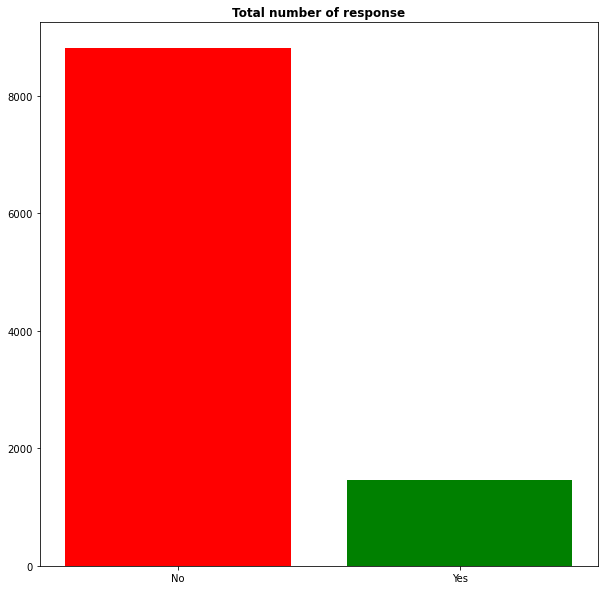

In [5]:
fig1, response_plot = plt.subplots(figsize = (10,10))

response_plot.set_title('Total number of response', fontweight='bold')

# plot the bar chart
response_plot.bar(response.index, response, color=('red','green'))

In [6]:
#Show a plot of the response rate by the sales channel
channel = df['sales channel'].value_counts()
channel

Agent          4121
Branch         3022
Call Center    2141
Web            1626
Name: sales channel, dtype: int64

In [7]:
response_channel = df.groupby(['response','sales channel'])['gender'].count().rename('count').reset_index()
response_channel

,response,sales channel,count
0,No,Agent,3148
1,No,Branch,2539
2,No,Call Center,1792
3,No,Web,1334
4,Yes,Agent,742
5,Yes,Branch,326
6,Yes,Call Center,221
7,Yes,Web,177


<AxesSubplot:title={'center':'Response Rate by Sales Channel'}, xlabel='sales channel', ylabel='count'>

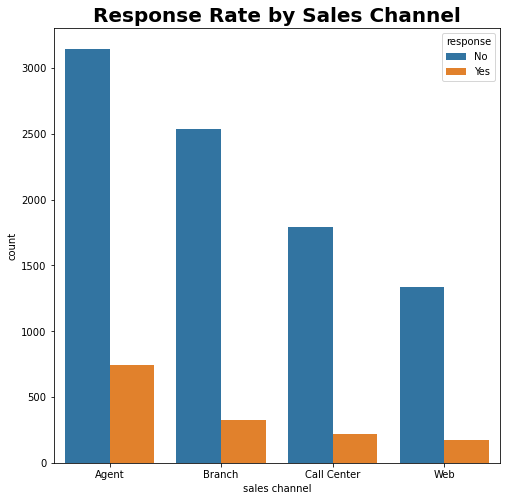

In [8]:
fig2, pt2 = plt.subplots(figsize = (8,8))
pt2.set_title('Response Rate by Sales Channel', size='20', fontweight='bold')

sns.barplot(hue = response_channel['response'], y=response_channel['count'], x = response_channel['sales channel'])

<AxesSubplot:title={'center':'Response Rate by total claim'}, xlabel='response', ylabel='total claim amount'>

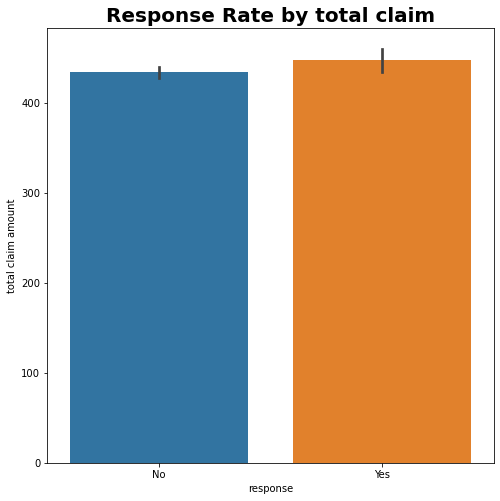

In [9]:
#Show a plot of the response rate by the total claim amount.
fig3, pt3= plt.subplots(figsize = (8,8))
pt3.set_title('Response Rate by total claim', size='20', fontweight='bold')

sns.barplot(y=df['total claim amount'], x = df['response'])

In [98]:
#Show a plot of the response rate by income.

pd.cut(df['income'],4)

0        (24995.25, 49990.5]
1        (-99.981, 24995.25]
2        (-99.981, 24995.25]
3        (24995.25, 49990.5]
4        (-99.981, 24995.25]
                ...         
10905    (-99.981, 24995.25]
10906    (49990.5, 74985.75]
10907    (24995.25, 49990.5]
10908    (49990.5, 74985.75]
10909    (-99.981, 24995.25]
Name: income, Length: 10910, dtype: category
Categories (4, interval[float64, right]): [(-99.981, 24995.25] < (24995.25, 49990.5] < (49990.5, 74985.75] < (74985.75, 99981.0]]

In [99]:
income_labels = ['Low', 'Moderate', 'High', 'Very High']
df['income_range'] = pd.cut(df['income'],4, labels=income_labels)

In [100]:
response_income = df.groupby(['response','income_range'])['gender'].count().rename('count').reset_index()
response_income

,response,income_range,count
0,No,Low,3435
1,No,Moderate,2225
2,No,High,1835
3,No,Very High,1318
4,Yes,Low,558
5,Yes,Moderate,390
6,Yes,High,335
7,Yes,Very High,183


<AxesSubplot:title={'center':'Response Rate by Income'}, xlabel='income_range', ylabel='count'>

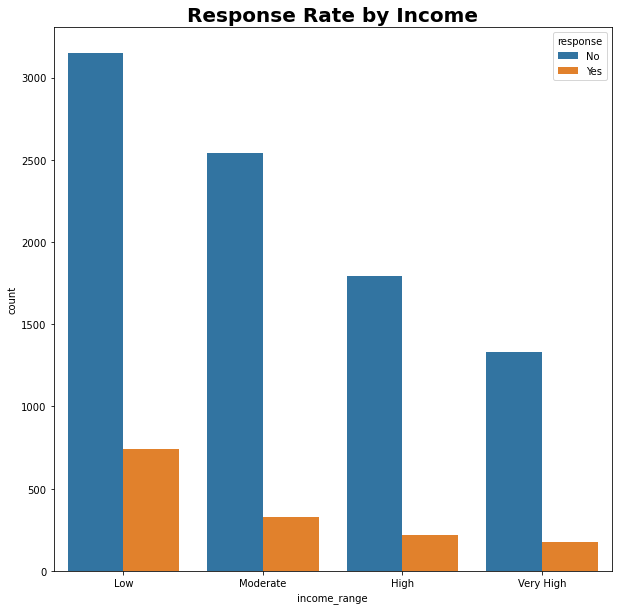

In [101]:
fig4, pt4 = plt.subplots(figsize = (10,10))
pt4.set_title('Response Rate by Income', size='20', fontweight='bold')

sns.barplot(hue = response_income['response'], y=response_channel['count'], x = response_income['income_range'])

<AxesSubplot:>

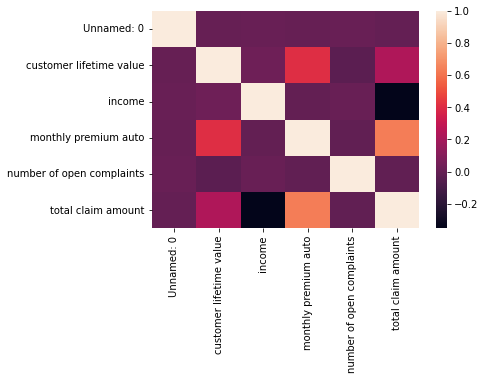

In [102]:
#Plot the Correlation Heatmap
sns.heatmap(df.corr())

In [10]:
df.corr()

,Unnamed: 0,customer lifetime value,income,monthly premium auto,number of open complaints,total claim amount
Unnamed: 0,1.000000,0.001355,0.008910,0.000863,0.007325,-0.000593
customer lifetime value,0.001355,1.000000,0.028306,0.403069,-0.032243,0.232626
income,0.008910,0.028306,1.000000,-0.009788,0.007163,-0.354141
monthly premium auto,0.000863,0.403069,-0.009788,1.000000,-0.010350,0.631799
number of open complaints,0.007325,-0.032243,0.007163,-0.010350,1.000000,-0.011379
total claim amount,-0.000593,0.232626,-0.354141,0.631799,-0.011379,1.000000


activity 5
- Check the data types of the columns. Get the numeric data into dataframe called `numerical` and categorical columns in a dataframe called `categoricals`. (You can use np.number and np.object to select the numerical data types and categorical data types respectively)
- Now we will try to check the normality of the numerical variables visually
  - Use seaborn library to construct distribution plots for the numerical variables
  - Use Matplotlib to construct histograms
  - Do the distributions for different numerical variables look like a normal distribution 
- For the numerical variables, check the multicollinearity between the features. Please note that we will use the column `total_claim_amount` later as the target variable. 
- Drop one of the two features that show a high correlation between them (greater than 0.9). Write code for both the correlation matrix and for seaborn heatmap. If there is no pair of features that have a high correlation, then do not drop any features

